Let's create 20 different training sets from the true model $h=sin(x)$. 

We fit polynomial regression to the training set. $y=\beta_0 +\beta_1 x +\beta_2 x^2 +....$

We can control the complexity of the polynomial (model) using $complexity$ variable. 

Let's visualize each of fitted models corresponding to the 20 different training data (wait 20 seconds).

In [9]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import time 
from IPython import display
warnings.filterwarnings("ignore")
%matplotlib inline

complexity = 40
y_t_pred=[]

x = np.array([i*np.pi/180 for i in range(5,350,1)]) #angles from 10 to 360 in degrees
y = np.sin(x) 
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,16):  #power of 1 is already there, starting with 2
    colname = 'x_%d'%i      
    data[colname] = data['x']**i
X_test= data.drop('y', axis=1)
y_test=data['y']

for trial in range(20):
    x = np.array([i*np.pi/180 for i in range(0,360,3)]) #angles from 10 to 360 in degrees
    y = np.sin(x) + np.random.normal(0,0.3,len(x))
    data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
    for i in range(2,16):  #power of 1 is already there, starting with 2
        colname = 'x_%d'%i      
        data[colname] = data['x']**i
    X_df= data.drop('y', axis=1)
    y_df=data['y']
    X_train, X_valid, y_train, y_valid=train_test_split(X_df,y_df,test_size=0.2)
    X_train = X_train.sort_index()
    y_train = y_train.sort_index()

    independent_variable_train = X_train[X_train.columns[0:complexity]].values

    linreg = LinearRegression(normalize=True)
    linreg = linreg.fit(independent_variable_train,y_train.values)
    y_tr = linreg.predict(independent_variable_train)
    if not y_t_pred==[]:
        y_t=linreg.predict(X_test[X_test.columns[0:complexity]].values)
        y_t_pred=np.vstack((y_t_pred,y_t[np.newaxis,:]))
    else: 
        y_t = linreg.predict(X_test[X_test.columns[0:complexity]].values)
        y_t_pred = y_t[np.newaxis,:]
        

    plt.plot(X_train['x'],y_train,'.')
    plt.plot(X_test['x'],y_t_pred[trial,:])
    plt.title("fitted model according to the current given training data")
    plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

<Figure size 640x480 with 0 Axes>

Now, compare the average of the fitted 20 models to the true model and each of the individual models.

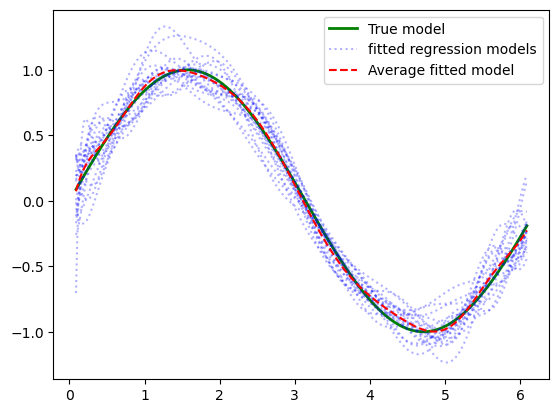

In [10]:
y_average = y_t_pred.mean(axis=0)
p1, = plt.plot(X_test['x'],y_test,'g',linewidth=2, label = 'True model')
for item in range(y_t_pred.shape[0]):
    p2, = plt.plot(X_test['x'],y_t_pred[item,:],'b',ls=':',alpha = 0.3, label='fitted regression models')
p3, = plt.plot(X_test['x'],y_average,'r',ls='--', label='Average fitted model')
plt.legend(handles=[p1,p2,p3])
plt.show()

For $complexity=1$:

    - Bias is high (very high difference between the average model and true model) but variance is low (the difference between each model and the average model).
    
    
For $complexity=40$:

    - Bias is low (very small difference between the average model and true model) but variance is very high.